<a href="https://colab.research.google.com/github/Emily-Weng/Restaurant-Name-Predition-AI/blob/main/%E9%A4%90%E5%BB%B3%E9%A2%A8%E6%A0%BC%EF%BC%A1I_Word2Vector%E7%89%88(%E6%84%89%E5%AA%83).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 讀入google drive並進入放置檔案的資料夾

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/餐廳名子預測')  #切換當前工作目錄到新的指定路徑

# 先下載斷詞套件
這邊我們使用的是ckiptagger，是繁體斷詞相對較好的套件，是中研院資訊所開發

其他最常被使用的套件有Stanford CoreNLP (simplified Chinese)

● Other popular ones:

○ LTP Cloud (simplified Chinese)

○ jieba (segmentation, both simplified/traditional
Chinese)

In [ ]:
!pip3 install ckiptagger
!pip3 install tensorflow
!pip3 install gdown

from ckiptagger import data_utils
data_utils.download_data_gdown("./")

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/drive/MyDrive/Colab Notebooks/餐廳名子預測/data.zip
100%|██████████| 1.88G/1.88G [00:13<00:00, 137MB/s] 


# 把會用到的套件全部下載

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
from ckiptagger import WS, POS, NER
from tensorflow.keras.preprocessing.text import Tokenizer
from urllib.request import urlretrieve
import pickle
import re
!pip3 install scikit-learn #切資料套件
from sklearn.model_selection import train_test_split #Import train_test_split() 這個函式到我們的程式當中

#讀入深度學習套件
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM,GRU
from tensorflow import keras

# x_train的資料前置準備

In [ ]:
restaurant_name = pd.read_excel('最終餐廳.xlsx',usecols='A')
restaurant_name.head()

,restaurant
0,新竹吳家鴨香飯 (台南永康華興店)
1,早安牛肉湯美食館
2,楊記炒飯專賣店
3,阿紅魚肚湯鹹粥
4,川蜀滷味


##把用不到的特殊字元消除

In [ ]:
characters = "'!?()（） ,•[]【】。- —— / # .・的の"
txt_x = []
name_list = list(restaurant_name['restaurant'])
for content in name_list:
    for specialChar in characters:
      content = content.replace(specialChar, '')
    txt_x.append(content)
    print(content)

新竹吳家鴨香飯台南永康華興店
早安牛肉湯美食館
楊記炒飯專賣店
阿紅魚肚湯鹹粥
川蜀滷味
珍愛找茶
老溫小吃
上榮新疆烤肉串台南永康店
早菜單蔬食手作
狗啃玉米
日日十
易立低卡餐
陳記鴨肉麵
美式酥脆炸雞
兔子高帽雞蛋燒
日安Bonjour早餐
辣不唧ㄦ
億品鍋
燴廚燴飯專賣永康中華二店
頤真炸雞台南開元店
戰燒烤
八道晟台南永康中華店
皮咘咘早點
雞排本色台南成功店
聚會所熱炒燒烤
好ㄘ滷味
台南老張鹹酥雞
聚悅居義大利麵
大腸包小腸台南開元店
皇鼎御品鍋
窺雞福來得CrazyFriday台灣鹽酥雞
早美味美
柴與咖哩
豬血湯
京川鍋物
YUMMY蔥油餅台南成大店
洪城牛肉麵
飯島屋
奇美咖啡館
日光緩緩無毒早午餐台南東豐店
明太煮酸菜魚
找點
一鍋豔紅
中埔烤肉台南永康店
酒鬍子創意鍋燒
恐龍脆皮雞蛋糕
嘟嘟牛排台南永康店
御川香麻辣香鍋
阿明食堂台南中華店
茶米茶
Gpasta專業焗烤
Goodgee菇雞
黃家嫩骨飯
泰無國界料理
奧莉薇生活廚房
3爺臭臭鍋
米里mini永康華興店
廟口肉燥飯
蛤們鍋燒
北園東山鴨頭
幸運草小坊
THEYUAN台南東興店
港聚
敲之助鉄板焼き牛丼洋食
古根食堂鴨香飯
石橋子燒餅店
瑪奇甜甜圈
粟味齋蔬食
大夯牛排館台南育樂店
湖南牛肉麵店
大糖甜品台南東安店
享受牛排館
福來鱔魚意麵台南開元店
東寧烤肉
鳳記鹹酥雞
陳媽麵攤
金子半之助
自在軒台南東平店
烏咖蝦咖
早到晚到台南成大店
明洞海苔飯捲台南中華店
林家素食
盛來炒飯店
豬排專賣店
Q弟紅豆餅台南育樂店
成大館台南育樂店
九州豚骨拉麵台南育樂店
五木炭土司
梃記雞蛋糕
魔王狂爆雞排台南開元店
王廚活力廚房
來道黃燜雞米飯
邁滋味精緻早午餐
大上海鹹酥雞台南育樂店
甜圈圈台南淺草店
獨角康妮暮茶社
藏金安平貓小巴
小東路無名麵店竹滬麵店
潮洲宵夜
夏雪
Yes58義大利麵台南成大店
臭灶脚東寧店台北深坑清蒸麻辣臭豆腐
有時候手作杏仁甜湯
宵夜霸
粉味車輪餅台南勝利店
李記紅茶冰永康中華一店
香姑姑鹽酥雞
熱氣球雞蛋糕永康五王店
小董牛肉湯●爐
大大力牛排館
蔬食樂初始店SoothRoadOriginal
紅樓小館
哩賀雞蛋糕台南總店
楽飲Loving
玩真臭豆腐
文心圓手作蔬素食
DoubleCheese手工窯烤披薩
燕子吧雪燕窩桃膠蓮子銀耳
花福日式咖哩
沃野18餐

##斷詞(WS),返回的是一個 list。

In [ ]:
ws = WS("./data")
txts = []
for x in txt_x:
   txts.append(x)
ws_results = ws(txts)
ws_results

/usr/local/lib/python3.7/dist-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:988: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  partitioner=maybe_partitioner)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:996: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=initializer)


[['新竹', '吳家鴨', '香飯', '台南', '永康', '華興店'],
 ['早安', '牛肉湯', '美食館'],
 ['楊記', '炒飯', '專賣店'],
 ['阿紅', '魚肚湯', '鹹', '粥'],
 ['川蜀', '滷味'],
 ['珍愛', '找', '茶'],
 ['老', '溫', '小吃'],
 ['上榮', '新疆', '烤', '肉串', '台南', '永康店'],
 ['早菜', '單蔬', '食', '手作'],
 ['狗', '啃', '玉米'],
 ['日日', '十'],
 ['易', '立', '低卡餐'],
 ['陳記', '鴨肉麵'],
 ['美式', '酥脆', '炸雞'],
 ['兔子', '高帽', '雞蛋', '燒'],
 ['日安', 'Bonjour', '早餐'],
 ['辣', '不', '唧', 'ㄦ'],
 ['億品鍋'],
 ['燴廚', '燴飯', '專賣', '永康', '中華', '二店'],
 ['頤真', '炸雞', '台南', '開元店'],
 ['戰燒', '烤'],
 ['八', '道晟', '台南', '永康', '中華店'],
 ['皮', '咘咘', '早點'],
 ['雞排', '本色', '台南', '成功店'],
 ['聚會', '所', '熱', '炒', '燒', '烤'],
 ['好', 'ㄘ', '滷味'],
 ['台南', '老張', '鹹酥雞'],
 ['聚悅', '居', '義大利麵'],
 ['大腸包', '小腸', '台南', '開元店'],
 ['皇鼎', '御品鍋'],
 ['窺', '雞福', '來得', 'Crazy', 'Friday', '台灣', '鹽酥雞'],
 ['早', '美味', '美'],
 ['柴', '與', '咖哩'],
 ['豬血湯'],
 ['京川', '鍋物'],
 ['YUMMY', '蔥油餅', '台南', '成大店'],
 ['洪城', '牛肉麵'],
 ['飯島屋'],
 ['奇美', '咖啡館'],
 ['日光', '緩緩', '無', '毒', '早午餐', '台南', '東豐店'],
 ['明', '太', '煮', '酸菜魚'],
 ['找', '點'],
 ['一', '鍋', '豔紅'],


#引入Word2Vec套件

In [ ]:
from gensim.models import Word2Vec

#建立和訓練Word2Vector的model

In [ ]:
myWord2Vec =Word2Vec(ws_results,size=25,iter=10,sg=1,min_count=1)

#size:丟進rnn的embedding的vector是25
#iter:iteration至少跑10次
#min_count:1 =>代表這個詞只要出現1次就會被丟進word2vector裡面(min_count原先代表這個詞要出現幾次才會丟進去)
#size:餐廳名稱通常不會超過25個字,不足25個字要補0,這裡不應設太大否則效果會受太多0的影響而變差
#sg:1個method:可對現在丟進來的詞去臆測他前一個詞

In [ ]:
print(myWord2Vec)

Word2Vec(vocab=4237, size=25, alpha=0.025)


#看看Word2Vector字典裡的所有單字

In [ ]:
myWord2Vec.wv.vocab

{'新竹': <gensim.models.keyedvectors.Vocab at 0x7fe2640fca10>,
 '吳家鴨': <gensim.models.keyedvectors.Vocab at 0x7fe2640fca90>,
 '香飯': <gensim.models.keyedvectors.Vocab at 0x7fe2640fcad0>,
 '台南': <gensim.models.keyedvectors.Vocab at 0x7fe2640fcb10>,
 '永康': <gensim.models.keyedvectors.Vocab at 0x7fe2640fcb90>,
 '華興店': <gensim.models.keyedvectors.Vocab at 0x7fe2640fcc10>,
 '早安': <gensim.models.keyedvectors.Vocab at 0x7fe2640fcc50>,
 '牛肉湯': <gensim.models.keyedvectors.Vocab at 0x7fe2640fcc90>,
 '美食館': <gensim.models.keyedvectors.Vocab at 0x7fe2640fcb50>,
 '楊記': <gensim.models.keyedvectors.Vocab at 0x7fe2640fcbd0>,
 '炒飯': <gensim.models.keyedvectors.Vocab at 0x7fe2640fccd0>,
 '專賣店': <gensim.models.keyedvectors.Vocab at 0x7fe2640fcd10>,
 '阿紅': <gensim.models.keyedvectors.Vocab at 0x7fe2640fcd50>,
 '魚肚湯': <gensim.models.keyedvectors.Vocab at 0x7fe2640fcd90>,
 '鹹': <gensim.models.keyedvectors.Vocab at 0x7fe2640fcdd0>,
 '粥': <gensim.models.keyedvectors.Vocab at 0x7fe2640fce10>,
 '川蜀': <gensim.model

#先前斷詞的結果被轉成數字(根據Word2Vector的字典順序給每個餐廳名字的list編號)

In [ ]:
for i in range(len(ws_results)):
  print([myWord2Vec.wv.vocab[sen].index for sen in ws_results[i]])

[245, 654, 655, 16, 209, 656]
[157, 455, 210]
[1116, 158, 9]
[1117, 1118, 354, 42]
[657, 5]
[1119, 292, 40]
[79, 1120, 35]
[1121, 1122, 25, 1123, 16, 456]
[1124, 1125, 80, 114]
[1126, 658, 293]
[1127, 1128]
[659, 1129, 1130]
[355, 1131]
[61, 1132, 8]
[1133, 1134, 660, 0]
[661, 1135, 48]
[246, 185, 1136, 1137]
[662]
[1138, 1139, 67, 209, 247, 663]
[1140, 8, 16, 294]
[664, 25]
[356, 1141, 16, 209, 53]
[1142, 1143, 248]
[76, 665, 16, 295]
[1144, 186, 187, 11, 0, 25]
[43, 1145, 5]
[16, 1146, 81]
[1147, 296, 159]
[666, 667, 16, 294]
[1148, 1149]
[668, 669, 670, 671, 672, 62, 138]
[44, 297, 68]
[1150, 298, 41]
[1151]
[1152, 71]
[1153, 115, 16, 457]
[1154, 19]
[1155]
[1156, 1157]
[1158, 1159, 139, 1160, 20, 16, 1161]
[673, 249, 140, 674]
[292, 357]
[15, 116, 1162]
[1163, 299, 16, 456]
[1164, 675, 0]
[458, 250, 30]
[459, 32, 16, 456]
[1165, 1166, 676]
[1167, 17, 16, 53]
[1168]
[1169, 188, 677]
[1170, 1171]
[678, 1172]
[300, 139, 1173, 1]
[1174, 679, 26]
[680, 1175, 86]
[1176, 1177, 209, 656]
[

#發現"苗栗"這個單字在字典裡的號碼是0

In [ ]:
myWord2Vec.wv.vocab['苗栗'].index

27

##因為我們要把每個不足25維的vector後面都補0,但0目前代表"苗栗"這個詞,假設餐廳名字是"八方雲集",補完0後就會變成"八方雲集苗栗苗栗苗栗苗栗........",會影響判斷。所以要把每個vocabulary號碼都加1,讓"苗栗"的號碼從0變1,而0號待會會留給內容全都是0的vector


##把每個詞的index+1(本來的0會變1)
##[137, 138, 60, 8, 139]=>[138, 139, 61, 9, 140]


In [ ]:
a=[]
for i in range(len(ws_results)):
  a.append([(1+myWord2Vec.wv.vocab[sen].index) for sen in ws_results[i]])

In [ ]:
print(a)

[[246, 655, 656, 17, 210, 657], [158, 456, 211], [1117, 159, 10], [1118, 1119, 355, 43], [658, 6], [1120, 293, 41], [80, 1121, 36], [1122, 1123, 26, 1124, 17, 457], [1125, 1126, 81, 115], [1127, 659, 294], [1128, 1129], [660, 1130, 1131], [356, 1132], [62, 1133, 9], [1134, 1135, 661, 1], [662, 1136, 49], [247, 186, 1137, 1138], [663], [1139, 1140, 68, 210, 248, 664], [1141, 9, 17, 295], [665, 26], [357, 1142, 17, 210, 54], [1143, 1144, 249], [77, 666, 17, 296], [1145, 187, 188, 12, 1, 26], [44, 1146, 6], [17, 1147, 82], [1148, 297, 160], [667, 668, 17, 295], [1149, 1150], [669, 670, 671, 672, 673, 63, 139], [45, 298, 69], [1151, 299, 42], [1152], [1153, 72], [1154, 116, 17, 458], [1155, 20], [1156], [1157, 1158], [1159, 1160, 140, 1161, 21, 17, 1162], [674, 250, 141, 675], [293, 358], [16, 117, 1163], [1164, 300, 17, 457], [1165, 676, 1], [459, 251, 31], [460, 33, 17, 457], [1166, 1167, 677], [1168, 18, 17, 54], [1169], [1170, 189, 678], [1171, 1172], [679, 1173], [301, 140, 1174, 2], 

In [ ]:
embedding_matrix=myWord2Vec.wv.vectors #把embedding的vector全部抓出來

###看embedding matrix有多大

In [ ]:
embedding_matrix.shape

(4237, 25)

##embedding vector全部往後移一個位置,第一個位置留給 "0向量"

In [ ]:
embedding_matrix[0] #原先第一個embedding的是'苗栗'這個詞的embedding向量

array([-0.0163892 ,  0.01802979,  0.02611982,  0.07876943,  0.12879165,
       -0.03984154, -0.07967658,  0.10527093,  0.00385982,  0.04380113,
       -0.03853176, -0.05256611,  0.05950645, -0.04732595,  0.06729538,
       -0.02424076, -0.02944959,  0.02762897,  0.1211836 ,  0.08240251,
       -0.02359393, -0.05716142,  0.093376  , -0.0710966 , -0.05019113],
      dtype=float32)

In [ ]:
embedding_matrix=np.vstack((np.array(np.zeros(25)),embedding_matrix)) #(np.array(np.zeros(25)):把第一個embedding向量通通填0,所以'苗栗'就會往後移一格

In [ ]:
embedding_matrix[0] #成功把第一個embedding向量通通填0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
embedding_matrix[1] #'苗栗'的embedding向量移到1的位置

array([-0.0163892 ,  0.01802979,  0.02611982,  0.07876943,  0.12879165,
       -0.03984154, -0.07967658,  0.10527093,  0.00385982,  0.04380113,
       -0.03853176, -0.05256611,  0.05950645, -0.04732595,  0.06729538,
       -0.02424076, -0.02944959,  0.02762897,  0.1211836 ,  0.08240251,
       -0.02359393, -0.05716142,  0.093376  , -0.0710966 , -0.05019113])

###建立訓練樣本

In [ ]:
x = np.zeros([len(ws_results),25],dtype='float64')  
#先建立一個全為0的空向量x_train
#len(ws_results):x_train中總共有len(ws_results)個列,每個向量長度到25

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

###開始給x_train塞值

In [ ]:
ws_results[0][0]

'新竹'

In [ ]:
for i in range(len(ws_results)):
  for j in range(len(ws_results[i])):
    x[i,j]=1+myWord2Vec.wv.vocab[(ws_results[i][j])].index #ws_results[i][j]斷詞的結果
  

In [ ]:
x_test =[] #宣告一個空的list: x_test

In [ ]:
x_test=np.array(x_test)

# y_train的資料前置準備

In [ ]:
restaurant_style = pd.read_excel('最終餐廳.xlsx',usecols='G')
print(len(restaurant_style))
restaurant_style.head()

2873


,style
0,中式
1,中式
2,中式
3,中式
4,中式


##style_list是個是個list

In [ ]:
style_list = list(restaurant_style['style'])
style_list

['中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '日式',
 '中式',
 '美式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '韓式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '義式',
 '中式',
 '中式',
 '中式',
 '中式',
 '日式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '美式',
 '中式',
 '中式',
 '中式',
 '美式',
 '義式',
 '中式',
 '泰式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '義式',
 '港式',
 '日式',
 '中式',
 '中式',
 '中式',
 '中式',
 '美式',
 '中式',
 '中式',
 '美式',
 '中式',
 '中式',
 '中式',
 '中式',
 '日式',
 '中式',
 '日式',
 '中式',
 '韓式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '日式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '日式',
 '中式',
 '中式',
 '中式',
 '義式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '美式',
 '義式',
 '中式',
 '中式',
 '中式',
 '中式',
 '中式',
 '義式',
 '中式',
 '日式',
 '中式',
 '中式',
 '中式',
 '美式',
 '中式',
 '中式',
 '中式',
 '日式',
 '印度',
 '日式',
 '中式',
 '中式',
 '日式',
 '日式',
 '中式',
 '義式',
 '中式',
 '中式',
 '中式',
 '中式',
 '越式',
 '中式',
 '中式',
 '中式',

In [ ]:
set(restaurant_style['style'])

{'中式',
 '印尼',
 '印度',
 '台式',
 '日式',
 '歐式',
 '法式',
 '泰式',
 '港式',
 '澳式',
 '美式',
 '義式',
 '越式',
 '韓式',
 '馬來西亞'}

## y 用 one-hot encoding處理


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categories="auto")
sequences = onehotencoder.fit_transform(restaurant_style).toarray()
sequences

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

把數據放進把數據放進y

In [ ]:
y = sequences

In [ ]:
y_test=[]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=87)
print('y_train',y_train)
print('y_test',y_test)

y_train [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
y_test [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
len(y_train)

2298

In [ ]:
x_train=np.asarray(x_train)

In [ ]:
x_test=np.asarray(x_test)

In [ ]:
y_train = np.asarray(y_train)

In [ ]:
y_test = np.asarray(y_test)

### 4. step 01: 打造一個函數學習機

In [ ]:
model = Sequential()

batch = 32，更改batch維度

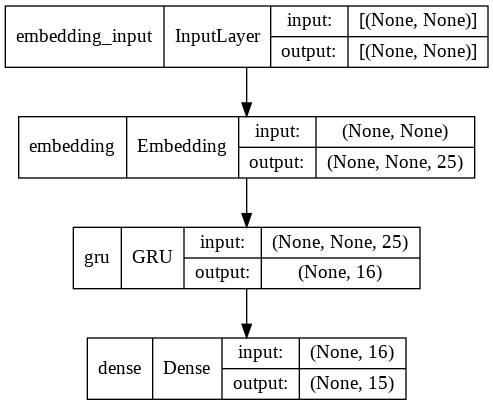

In [ ]:
model.add(Embedding(len(myWord2Vec.wv.vocab)+1, 25))#len(myWord2Vec.wv.vocab):斷詞的數量 output是25:25是我embedding vector的大小
model.add(GRU(16))
model.add(Dense(15, activation='softmax'))#共多標籤要用softmax
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.layers[0].set_weights([embedding_matrix])#model.layer[0]=>RNN裡第0層是不訓練的,但是要設定好weight=>set weight
model.layers[0].trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 25)          105950    
                                                                 
 gru (GRU)                   (None, 16)                2064      
                                                                 
 dense (Dense)               (None, 15)                255       
                                                                 
Total params: 108,269
Trainable params: 2,319
Non-trainable params: 105,950
_________________________________________________________________


#### 組裝

In [ ]:
model.compile(loss='categorical_crossentropy', #多標籤是用categorical_crossentropy作為loss函數、optimizer使用adam
             optimizer='adam',
              metrics=['accuracy'])

#### 欣賞我們的 model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 25)          105950    
                                                                 
 gru (GRU)                   (None, 16)                2064      
                                                                 
 dense (Dense)               (None, 15)                255       
                                                                 
Total params: 108,269
Trainable params: 2,319
Non-trainable params: 105,950
_________________________________________________________________


### 5. step 02: 訓練

訓練次數10次、batch_size改成10

In [ ]:
import tensorflow as tf

x_train = tf.stack(x_train)
y_train = tf.stack(y_train)
x_test = tf.stack(x_test)
y_test = tf.stack(y_test)

In [ ]:
len(y_train)

2298

In [ ]:
history=model.fit(x_train, y_train, batch_size=300, epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
8/8 [==============================] - 3s 137ms/step - loss: 2.6851 - accuracy: 0.6941 - val_loss: 2.6518 - val_accuracy: 0.7757
Epoch 2/10
8/8 [==============================] - 0s 28ms/step - loss: 2.6241 - accuracy: 0.7903 - val_loss: 2.5828 - val_accuracy: 0.7757
Epoch 3/10
8/8 [==============================] - 0s 29ms/step - loss: 2.5474 - accuracy: 0.7903 - val_loss: 2.4940 - val_accuracy: 0.7757
Epoch 4/10
8/8 [==============================] - 0s 32ms/step - loss: 2.4456 - accuracy: 0.7903 - val_loss: 2.3728 - val_accuracy: 0.7757
Epoch 5/10
8/8 [==============================] - 0s 31ms/step - loss: 2.3022 - accuracy: 0.7903 - val_loss: 2.1950 - val_accuracy: 0.7757
Epoch 6/10
8/8 [==============================] - 0s 30ms/step - loss: 2.0833 - accuracy: 0.7903 - val_loss: 1.9060 - val_accuracy: 0.7757
Epoch 7/10
8/8 [==============================] - 0s 28ms/step - loss: 1.7089 - accuracy: 0.7903 - val_loss: 1.3943 - val_accuracy: 0.7757
Epoch 8/10
8/8 [==========

In [ ]:
model.predict(x_train)

array([[8.77444208e-01, 6.72030030e-04, 1.02206580e-02, ...,
        1.91984803e-03, 3.80187971e-03, 5.79881389e-03],
       [8.78356755e-01, 6.62775012e-04, 1.01318546e-02, ...,
        1.89361093e-03, 3.76153179e-03, 5.73994359e-03],
       [8.78094852e-01, 6.65374973e-04, 1.01574417e-02, ...,
        1.90128013e-03, 3.77305318e-03, 5.75754419e-03],
       ...,
       [8.77568960e-01, 6.70742767e-04, 1.02085555e-02, ...,
        1.91630691e-03, 3.79633834e-03, 5.79101313e-03],
       [8.77913654e-01, 6.67199958e-04, 1.01750782e-02, ...,
        1.90652150e-03, 3.78105557e-03, 5.76938689e-03],
       [8.77470255e-01, 6.71757502e-04, 1.02181397e-02, ...,
        1.91911892e-03, 3.80071602e-03, 5.79723530e-03]], dtype=float32)

### 6. step 03: 測試

把準確度和loss畫成圖表示

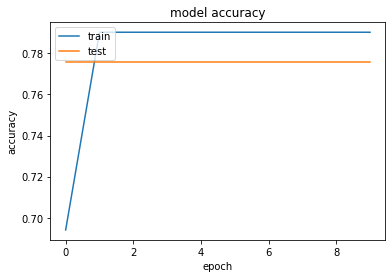

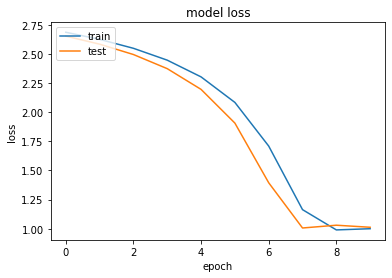

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

用gradio來讓大家互動

In [ ]:
!pip install gradio
import gradio as gr

     |████████████████████████████████| 865 kB 5.1 MB/s 
     |████████████████████████████████| 2.0 MB 38.4 MB/s 
     |████████████████████████████████| 210 kB 47.1 MB/s 
     |████████████████████████████████| 856 kB 44.1 MB/s 
     |████████████████████████████████| 3.6 MB 41.9 MB/s 
     |████████████████████████████████| 61 kB 395 kB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=4d0497dfa9299f1db61191d3aa8da52c0eafe2ed59014ec477a1861d8c889e46
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3373 sha256=3fda18dbf540f39727a8d37ab17bf23ccbd77231509c0b6d9f2a398a80dfee10
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [ ]:
label = ['中式','印尼','印度','台式','日式','歐式','法式','泰式','港式','澳式','美式','義式','越式','韓式','馬來西亞']

In [ ]:
def pred(name):
  txts = []
  txts.append(name)
  ws_results=ws(txts)
  output = np.zeros([len(ws_results),25],dtype='float64')
  output=np.asarray(output)
  for i in range(len(ws_results)):
    for j in range(len(ws_results[i])):
      output[i,j]=1+myWord2Vec.wv.vocab[(ws_results[i][j])].index
  out = np.argmax(model.predict(output)[0])
  result = label[out]
  return result

In [ ]:
gr.Interface(fn=pred, inputs="text", outputs="label").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://38596.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://38596.gradio.app')

###困難

In [ ]:
chinese = 0
japan = 0
health = 0
ke = 0
india = 0
taiwan = 0
breakfast = 0
ti = 0
hongkong=0
usa=0
italy=0
vietnam=0
Vietnam_Rest=0
for style in list(restaurant_style['style']):
  if(style=="中式"):
    chinese = chinese+1
  if(style=="日式"):
    japan = japan+1
  if(style=="健康餐"):
    health = health+1
  if(style=="韓式"):
    ke = ke+1
  if(style=="印度餐廳"):
    india = india+1
  if(style=="台式"):
    taiwan = taiwan+1
  if(style=="早餐店"):
    breakfast = breakfast+1
  if(style=="泰式"):
    ti = ti+1
  if(style=="港式"):
    hongkong = hongkong+1
  if(style=="美式"):
    usa = usa+1
  if(style=="義式"):
    italy = italy+1
  if(style=="越式"):
    vietnam = vietnam+1
  if(style=="越南餐廳"):
    Vietnam_Rest = Vietnam_Rest+1
    